# Project: Clean And Analyze Employee Exit Surveys

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment ([DETE](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland))) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). We've made some slight modifications to these datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get you started analyzing the first question.

A data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

* ID: An id used to identify the participant of the survey
* SeparationType: The reason why the person's employment ended
* Cease Date: The year or month the person's employment ended
* DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

* Record ID: An id used to identify the participant of the survey
* Reason for ceasing employment: The reason why the person's employment ended
* LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

Reminder about some tools to clean and transform:

* Vectorized string methods to clean string columns
* The apply(), map(), and applymap() methods to transform data
* The fillna(), dropna(), and drop() methods to drop missing or unnecessary values
* The melt() function to reshape data
* The concat() and merge() functions to combine data

In [1]:

# Let's start by reading the datasets into pandas and exploring them.
import pandas as pd
import numpy as np

dete_survey=pd.read_csv("dete_survey.csv")
tafe_survey=pd.read_csv("tafe_survey.csv")

print("****Dete****")
print(dete_survey.info())
print("\n")
print(dete_survey.head())
print("\n")


****Dete****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical

#### Observations:
* We have 822 values for 56 columns
* Id has an int64 type
* In some columns we have the value "Not stated" like in "Start Date" and in others we have "NaN" value. We have to pay attention at that. Can we replace the first with the second which is more common?
* we can also see that we won't use all columns to complete our analysis
* Some columns have quite a lot of null-value like Aboriginal, Torres Strait, South Sea,Disability

In [2]:
print("****Tafe****")
print(tafe_survey.info())
print("\n")
print(tafe_survey.head())

****Tafe****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                               

#### Observations:
* We have 702 entries for 72 columns
* The Id column has a float64 type
* the name of some columns are not common, they are questions.
* The year column is a float rounded at one
* the answers at the questions sometimes have Nan-value, sometimes nothing, for somes colums we have range, and so on...


#### Conclusion:
* The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
* Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## Identify Missing Values and Drop Unnecessary Columns

We'll handle the first two issues. Recall that we can use the [pd.read_csv() function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to specify values that should be represented as NaN. We'll use this function to fix the missing values first. Then, we'll drop columns we know we don't need for our analysis.

In [3]:
# Read file by applying NaN value for "Not Stated"
dete_survey= pd.read_csv("dete_survey.csv",na_values="Not Stated")
# verify with "Role Start date" at index 2
dete_survey.head(2)

ID                    SeparationType Cease Date  DETE Start Date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   

   Role Start Date        Position Classification          Region  \
0           2004.0  Public Servant        A01-A04  Central Office   
1              NaN  Public Servant        AO5-AO7  Central Office   

                       Business Unit    Employment Status  ...   \
0  Corporate Strategy and Peformance  Permanent Full-time  ...    
1  Corporate Strategy and Peformance  Permanent Full-time  ...    

   Kept informed  Wellness programs  Health & Safety  Gender    Age  \
0              N                  N                N    Male  56-60   
1              N                  N                N    Male  56-60   

   Aboriginal  Torres Strait  South Sea  Disability  NESB  
0         NaN            NaN        NaN         NaN   Yes  
1         NaN            NaN        NaN         NaN   NaN  

[2 rows x 56 columns]

In [4]:
# Drop some useless columns
print(dete_survey.columns[28:49])
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)
dete_survey_updated.head(2)

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')


ID                    SeparationType Cease Date  DETE Start Date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   

   Role Start Date        Position Classification          Region  \
0           2004.0  Public Servant        A01-A04  Central Office   
1              NaN  Public Servant        AO5-AO7  Central Office   

                       Business Unit    Employment Status  ...   \
0  Corporate Strategy and Peformance  Permanent Full-time  ...    
1  Corporate Strategy and Peformance  Permanent Full-time  ...    

   Work life balance  Workload  None of the above  Gender    Age  Aboriginal  \
0              False     False               True    Male  56-60         NaN   
1              False     False              False    Male  56-60         NaN   

   Torres Strait  South Sea  Disability  NESB  
0            NaN        NaN         NaN   Yes  
1            NaN        NaN         NaN   NaN  

[2 rows x 35 columns]

In [5]:
print(tafe_survey.columns[17:66])
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66],axis=1)
tafe_survey_updated.head(2)

Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive w

Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   

                                     ...                                     \
0                                    ...                                      
1                                    ...                                      

  Contributing Factors. Study Contributing Factors. Travel  \
0                         NaN                          NaN   
1                           -                       Travel   

  Contributing Factors. Other Contributing Factors. NONE  \
0                         NaN                        NaN   
1                           -                          -   

  Gender. What is your Gender? CurrentAge. Current Age  \
0                       Female                  26  30   
1                          NaN                     NaN   

  Employment Type. Employment Type Classification. Classification  \
0              Temporary Full-time            Administration (AO)   
1                              NaN                            NaN   

  LengthofServiceOverall. Overall Length of Service at Institute (in years)  \
0                                                1-2                          
1                                                NaN                          

  LengthofServiceCurrent. Length of Service at current workplace (in years)  
0                                                1-2                         
1                                                NaN                         

[2 rows x 23 columns]

## Clean Column Names
Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis:

| dete_survey | tafe_survey | Definition |
| :-: | :-: | :-: |
|ID	Record |ID	|An id used to identify the participant of the survey
|SeparationType	| Reason for ceasing employment |The reason why the participant's employment ended
|Cease Date	| CESSATION YEAR | The year or month the participant's employment ended
|DETE Start Date || The year the participant began employment with the DETE
| |LengthofServiceOverall. Overall Length of Service at Institute (in years)| The length of the person's employment (in years)
|Age	| CurrentAge.Current Age |The age of the participant
|Gender	| Gender. What is your Gender? | The gender of the participant

Because we eventually want to combine them, we'll have to standardize the column names. Recall that we can use the **DataFrame.columns** attribute along with vectorized string methods to update all of the columns at once.

In [6]:
print(dete_survey_updated.columns)
dete_survey_updated.columns=dete_survey_updated.columns.str.lower().str.strip().str.replace(" ","_")
print("\n")
print("******************")
print("\n")
print(dete_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


******************


Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_t

In [7]:
# Update columns name in tafe_survey_updated
col_name = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}
print(tafe_survey_updated.columns)
tafe_survey_updated=tafe_survey_updated.rename(col_name,axis=1)
print("\n")
print("***********")
print("\n")
print(tafe_survey_updated.columns)

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

## Filter the Data
Next, let's remove more of the data we don't need.

Recall that our end goal is to answer the following question:

    Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
    
If we look at the unique values in the separationtype columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.   

In [8]:
print(dete_survey_updated["separationtype"][:5])
print("******")
print(tafe_survey_updated["separationtype"][:5])

0               Ill Health Retirement
1    Voluntary Early Retirement (VER)
2    Voluntary Early Retirement (VER)
3           Resignation-Other reasons
4                      Age Retirement
Name: separationtype, dtype: object
******
0    Contract Expired
1          Retirement
2          Retirement
3         Resignation
4         Resignation
Name: separationtype, dtype: object


Note that dete_survey_updated dataframe contains multiple separation types with the string 'Resignation':

* Resignation-Other reasons
* Resignation-Other employer
* Resignation-Move overseas/interstate

We'll have to account for each of these variations so we don't unintentionally drop data!

In this step, we may see what is known as a [SettingWithCopy Warning](https://www.dataquest.io/blog/settingwithcopywarning/). This won't prevent your code from running properly but it's just letting you know that whatever operation you're doing is trying to be set on a copy of a slice from a dataframe. Use the [DataFrame.copy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html) method on the result to avoid the SettingWithCopy Warning.

In [9]:
# review the unique values in the separationtype column in both df
print(dete_survey_updated["separationtype"].value_counts())
print("******")
print(tafe_survey_updated["separationtype"].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
******
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [10]:
# Select only the data for survey respondents who have a Resignation separation type
dete_bool_resign=dete_survey_updated["separationtype"].str.contains("Resignation")
print(dete_bool_resign.value_counts())
print("*******")
dete_resignations=dete_survey_updated[dete_bool_resign].copy()

tafe_bool_resign=tafe_survey_updated['separationtype']=='Resignation'
print(tafe_bool_resign.value_counts())
tafe_resignations=tafe_survey_updated[tafe_bool_resign].copy()

False    511
True     311
Name: separationtype, dtype: int64
*******
False    362
True     340
Name: separationtype, dtype: int64


## Verify the Data
Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge).

It may not always be possible to catch all of these errors, but by making sure the data seems reasonable to the best of our knowledge, we can stop ourselves from completing a data analysis project that winds up being useless because of bad data.

In this step, we'll just focus on verifying that the years in the cease_date and dete_start_date columns make sense. However, we can check the data for other issues as well!

* Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [11]:
# First, clean the cease_date
print(dete_resignations["cease_date"].value_counts(dropna=False))
print("\n")

# extract the year and change the type from str to float
dete_resignations["cease_date"]=dete_resignations["cease_date"].str.extract("([2][0][0-1][0-6])",expand=False).astype(float)
print(dete_resignations["cease_date"].value_counts(dropna=False))

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
2010         1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64


 2013.0    146
 2012.0    129
 2014.0     22
NaN         11
 2010.0      2
 2006.0      1
Name: cease_date, dtype: int64


In [12]:
# Secondly, check the values in the start_date
print(dete_resignations["dete_start_date"].value_counts(dropna=False).sort_index())
print("\n")

# Idem for tafe
print(tafe_resignations["cease_date"].value_counts().sort_index())
print("\n")


 1963.0     1
 1971.0     1
 1972.0     1
 1973.0     1
 1974.0     2
 1975.0     1
 1976.0     2
 1977.0     1
 1980.0     5
 1982.0     1
 1983.0     2
 1984.0     1
 1985.0     3
 1986.0     3
 1987.0     1
 1988.0     4
 1989.0     4
 1990.0     5
 1991.0     4
 1992.0     6
 1993.0     5
 1994.0     6
 1995.0     4
 1996.0     6
 1997.0     5
 1998.0     6
 1999.0     8
 2000.0     9
 2001.0     3
 2002.0     6
 2003.0     6
 2004.0    14
 2005.0    15
 2006.0    13
 2007.0    21
 2008.0    22
 2009.0    13
 2010.0    17
 2011.0    24
 2012.0    21
 2013.0    10
NaN        28
Name: dete_start_date, dtype: int64


2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64




#### Observations:
* There aren't any major issues with the years.
* The years in each dataframe don't span quite the same number of years.

## Create a New Column
Now that we've verified the years in the dete_resignations dataframe, we'll use them to create a new column. Recall that our end goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

You may have noticed that the tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service. In order to analyze both surveys together, we'll have to create a corresponding institute_service column in dete_resignations.

In [13]:
#print(type(dete_resignations["cease_date"].iloc[1]))
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

institute_service=dete_resignations['institute_service'].value_counts(dropna=False)
value_perc=institute_service.sort_index()
print(100*(value_perc/institute_service.sum()))

 0.0      6.430868
 1.0      7.073955
 2.0      4.501608
 3.0      6.430868
 4.0      5.144695
 5.0      7.395498
 6.0      5.466238
 7.0      4.180064
 8.0      2.572347
 9.0      4.501608
 10.0     1.929260
 11.0     1.286174
 12.0     1.929260
 13.0     2.572347
 14.0     1.929260
 15.0     2.250804
 16.0     1.607717
 17.0     1.929260
 18.0     1.607717
 19.0     0.964630
 20.0     2.250804
 21.0     0.964630
 22.0     1.929260
 23.0     1.286174
 24.0     1.286174
 25.0     0.643087
 26.0     0.643087
 27.0     0.321543
 28.0     0.643087
 29.0     0.321543
 30.0     0.643087
 31.0     0.321543
 32.0     0.964630
 33.0     0.321543
 34.0     0.321543
 35.0     0.321543
 36.0     0.643087
 38.0     0.321543
 39.0     0.964630
 41.0     0.321543
 42.0     0.321543
 49.0     0.321543
NaN      12.218650
Name: institute_service, dtype: float64


We created a new institute_service column that we'll use to analyze survey respondents according to their length of employment.

## Identify Dissatisfied Employees
Next, we'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

* tafe_survey_updated:
    
    * Contributing Factors. Dissatisfaction
    * Contributing Factors. Job Dissatisfaction
     
* dete_survey_updated:
    * job_dissatisfaction
    * dissatisfaction_with_the_department
    * physical_work_environment
    * lack_of_recognition
    * lack_of_job_security
    * work_location
    * employment_conditions
    * work_life_balance
    * workload
    
If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

In [14]:
col_dissatisfaction=["job_dissatisfaction","dissatisfaction_with_the_department","physical_work_environment",
     "lack_of_recognition","lack_of_job_security","work_location","employment_conditions",
     "work_life_balance","workload"]
dete_resignations[col_dissatisfaction].head(5)

job_dissatisfaction  dissatisfaction_with_the_department  \
3                 False                                False   
5                 False                                False   
8                 False                                False   
9                  True                                 True   
11                False                                False   

    physical_work_environment  lack_of_recognition  lack_of_job_security  \
3                       False                False                 False   
5                       False                False                 False   
8                       False                False                 False   
9                       False                False                 False   
11                      False                False                 False   

    work_location  employment_conditions  work_life_balance  workload  
3           False                  False              False     False  
5           False                   True              False     False  
8           False                  False              False     False  
9           False                  False              False     False  
11          False                  False              False     False

In [15]:
col_dissatisfaction_tafe=["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"]
for v in col_dissatisfaction_tafe:
    print(v, " :")
    print(tafe_resignations[v].value_counts(dropna=False))
    print("******")

Contributing Factors. Dissatisfaction  :
-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
******
Contributing Factors. Job Dissatisfaction  :
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64
******


Well convert the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' columns in the tafe_resignations dataframe to True, False, or NaN values.

In [16]:
def update_vals(val):
    if val=="NaN":
        return np.nan
    elif val=="-":
        return False
    else:
        return True

We'll use the [DataFrame.applymap() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html) to apply the function above to the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' in the tafe_resignations dataframe.

In [17]:
tafe_resignations[col_dissatisfaction_tafe]=tafe_resignations[col_dissatisfaction_tafe].applymap(update_vals)

We'll now create our new columns named **dissatisfied** by doing the following:

    if any of the columns above in (dete and tafe) contain a "True" value, we'll add a "True" value to our new column
    
To accomplish this, we'll use the [DataFrame.any() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html) to do the following:

* Return True if any element in the selected columns above is True
* Return False if none of the elements in the selected columns above is True
* Return NaN if the value is NaN

Here's the syntax we can use:

    df.any(axis=1, skipna=False) 

In [18]:
dete_resignations["dissatisfied"]=dete_resignations[col_dissatisfaction].any(axis=1, skipna=False)
tafe_resignations["dissatisfied"]=tafe_resignations[col_dissatisfaction_tafe].any(axis=1,skipna=False)

In [19]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

## Combine the Data

To recap, we've accomplished the following:

* Renamed our columns
* Dropped any data not needed for our analysis
* Verified the quality of our data
* Created a new institute_service column
* Cleaned the Contributing Factors columns
* Created a new column indicating if an employee resigned because they were dissatisfied in some way

Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the institute_service column, so when you combine the data, think about how to get the data into a form that's easy to aggregate.

In [20]:
# Add a column to each dataframe that 
# will allow us to easily distinguish between the two
dete_resignations_up["institute"]="DETE"
tafe_resignations_up["institute"]="TAFE"

# Combine the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)

print(combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Dissatisfaction                  340 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Interpersonal Conflict           332 non-null object
Contributing Factors. Job Dissatisfaction              340 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. NONE                             332 non-null object
Contributing Factors. Other                            332 non-null object
Contributing Factors. Study                            332 non-null object
Contributing Factors. Travel                           332 non-null ob

In [22]:
#Dropping any columns with less than 500 non null values.
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()
combined_updated[:1]

age  cease_date  dissatisfied    employment_status  gender   id  \
0  36-40      2012.0         False  Permanent Full-time  Female  4.0   

  institute institute_service position             separationtype  
0      DETE                 7  Teacher  Resignation-Other reasons

## Clean The Service Column

Now that we've combined our dataframes, we're almost at a place where we can perform some kind of analysis! First, though, we'll have to clean up the institute_service column. This column is tricky to clean because it currently contains values in a couple different forms:

In [23]:
combined_updated["institute_service"].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


To analyze the data, we'll convert these numbers into categories. We'll base our analysis on this article, which makes the argument that understanding employee's needs according to career stage instead of age is more effective.
We'll use the slightly modified definitions below:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [24]:
# Extracting the years of service
combined_updated["institute_service"]=combined_updated["institute_service"].astype(str)

combined_updated['institute_service'] = (combined_updated['institute_service']
                                         .str.replace( 'Less than 1 year','0')
                                         .str.replace( 'More than 20 years','21')
                                         .str.split('-').str[-1]
                                        )
# To use as input for our function
combined_updated['institute_service'] = combined_updated['institute_service'].astype(dtype = float)

We can replace 'More than 20 years' by '21' because in our function the highest label is "Veteran" which represents an experience beyond 11 years.

In [25]:
def labeling_years(val):
    if pd.isnull(val):
        return np.nan
    elif val<3:
        return "New"
    elif val<=6:
        return "Experienced"
    elif val<=10:
        return "Established"
    else:
        return "Veteran"

In [26]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(labeling_years)

In [27]:
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## Perform Initial Analysis
Now, let's finally do our first piece of analysis! We'll fill in missing values in the dissatisfied column and then aggregate the data, but note that we still have additional missing values left to deal with. This is meant to be an initial introduction to the analysis, not the final analysis.

Recall that the dissatisfied column consists of Boolean values, meaning they're either True or False. Methods such as the df.pivot_table() method actually treat Boolean values as integers, so a True value is considered to be 1 and a False value is considered to be 0. That means that we can aggregate the dissatisfied column and calculate the number of people in each group, the percentage of people in each group, etc.

In [28]:
# Verify the unique values
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

We don't have one "Nan" value

In [32]:
# Replace missing values with the most frequent value, False
#combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)

We'll use the [DataFrame.pivot_table() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) to calculate the percentage of dissatisfied employees in each service_cat group.

Since a True value is considered to be 1, calculating the mean will also calculate the percentage of dissatisfied employees. The default aggregation function is the mean, so you can exclude the aggfunc argument.

In [37]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
data_pct=combined_updated.pivot_table(index='service_cat',values='dissatisfied')

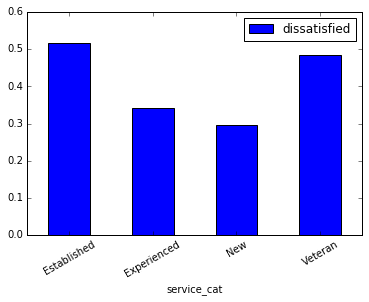

In [39]:
# Plot the results
%matplotlib inline
data_pct.plot(kind='bar', rot=30)

Based on our result, we can see taht more the employees gain experience more they become dissatisfied. New employees here have a score of 0.3 while Veteran and Established employees have a score of 0.5

Our work here is far from done! We can continue with the following steps:

* Decide how to handle the rest of the missing values. Then, aggregate the data according to the service_cat column again. How many people in each career stage resigned due to some kind of dissatisfaction?
* Clean the age column. How many people in each age group resgined due to some kind of dissatisfaction?
* Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?
* Format your project using Dataquest's project style guide.